In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/adronallen/Desktop/Data-Analysis/StudentsPerformance 2.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Data Cleaning and Check

In [29]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# Check for missing data 
data_check = data.isna()
data_check_results = data_check.sum()
print(data_check_results )

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
# Check for duplicates
print(data.duplicated().sum())

0


In [ ]:
# Check unique values for categorical columns
for col in ['lunch', 'gender', 'test preparation course']:
    print(col, data[col].unique())

lunch ['standard' 'free/reduced']
gender ['female' 'male']
test preparation course ['none' 'completed']


In [ ]:
# Checking for Outliers
numeric_cols = ['math score', 'reading score', 'writing score']
for col in numeric_cols:
    print(col, data[col].min(), data[col].max())

math score 0 100
reading score 17 100
writing score 10 100


Student Test Score Distributions

<function matplotlib.pyplot.show(close=None, block=None)>

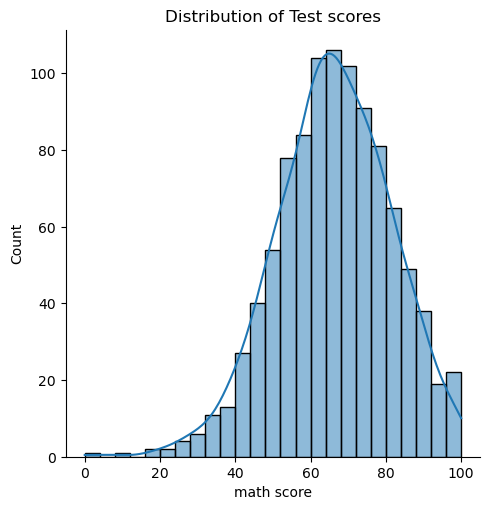

In [20]:
# Data Distribution check
sns.displot(data['math score'], kde=True)
plt.title('Distribution of Test scores')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

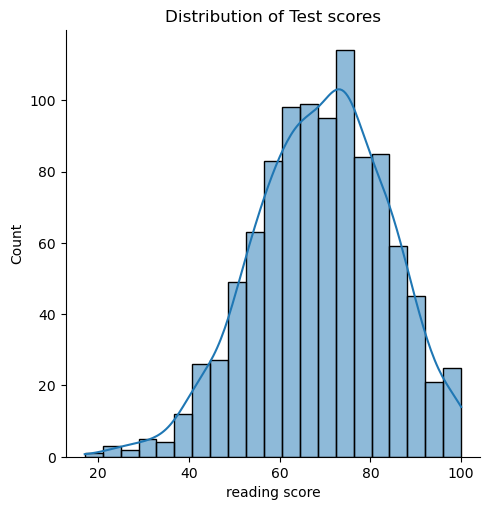

In [30]:
sns.displot(data['reading score'], kde=True)
plt.title('Distribution of Test scores')
plt.show


STUDENT DEMOGRAPHICS

<function matplotlib.pyplot.show(close=None, block=None)>

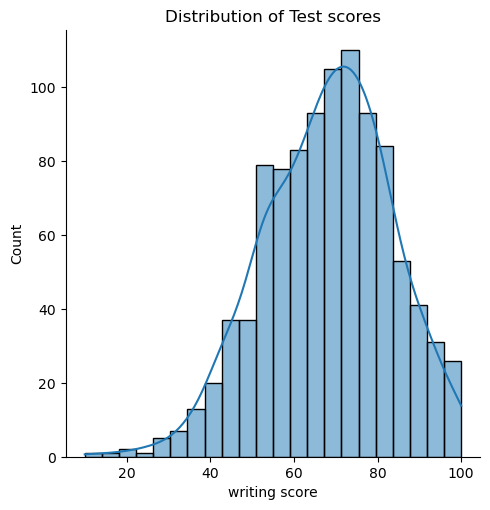

In [31]:
sns.displot(data['writing score'], kde=True)
plt.title('Distribution of Test scores')
plt.show


In [5]:

data.groupby(['parental level of education','test preparation course'])['writing score'].mean()

parental level of education  test preparation course
associate's degree           completed                  76.817073
                             none                       65.842857
bachelor's degree            completed                  78.695652
                             none                       69.986111
high school                  completed                  68.053571
                             none                       60.207143
master's degree              completed                  80.100000
                             none                       73.410256
some college                 completed                  76.519481
                             none                       64.872483
some high school             completed                  70.363636
                             none                       60.754902
Name: writing score, dtype: float64

In [6]:

data.groupby(['gender','test preparation course'])['math score'].median()

gender  test preparation course
female  completed                  67.0
        none                       62.0
male    completed                  73.0
        none                       67.0
Name: math score, dtype: float64

In [7]:

data.groupby('lunch')[['math score','reading score','writing score']].mean()


,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [8]:
free_lunch = data[data['lunch']=='free/reduced'][['math score', 'reading score', 'writing score']].median()
standard_lunch = data[data['lunch']=='standard'][['math score', 'reading score', 'writing score']].median()

In [9]:
free_lunch.head()

math score       60.0
reading score    65.0
writing score    64.0
dtype: float64

In [10]:
standard_lunch.head()

math score       69.0
reading score    72.0
writing score    72.0
dtype: float64

<Axes: xlabel='lunch', ylabel='math score'>

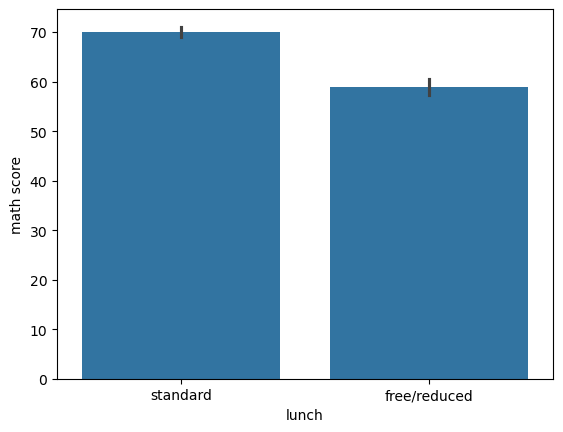

In [38]:
sns.barplot(
    x = 'lunch',
    y='math score',
    data = data
)

In [ ]:
# Level of parental education impacting students test scores.
level_of_ed_vs_scores1 = data[data['parental level of education']=='high school'][['math score', 'reading score', 'writing score']].median()
level_o_ed_vs_scores2= data[data['parental level of education']=='some college'][['math score', 'reading score', 'writing score']].median()

In [14]:
level_of_ed_vs_scores1.head()

math score       63.0
reading score    66.0
writing score    64.0
dtype: float64

In [15]:
level_o_ed_vs_scores2.head()

math score       67.5
reading score    70.5
writing score    70.0
dtype: float64

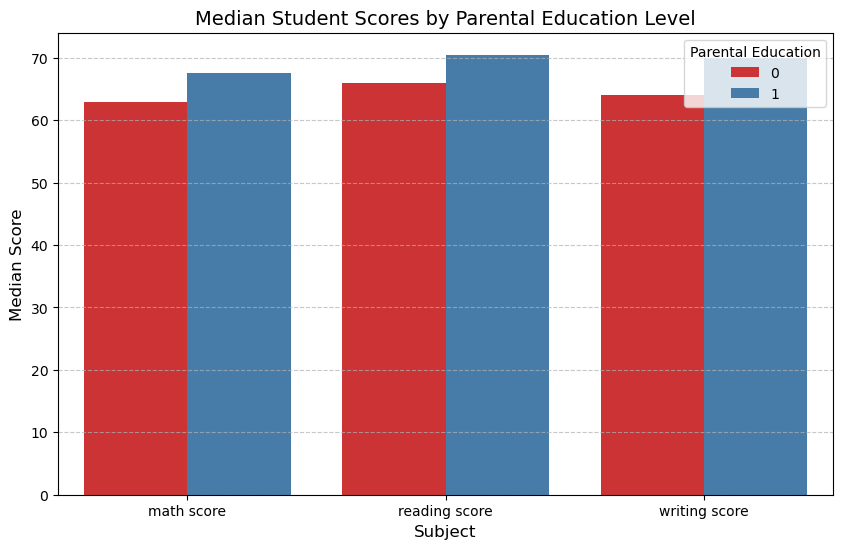

In [39]:
df_scores = pd.concat([level_of_ed_vs_scores1, level_o_ed_vs_scores2], axis=1).T
df_scores.index.name = 'Parental Education'

df_long = df_scores.reset_index().melt(
    id_vars='Parental Education',
    var_name='Subject',
    value_name='Median Score'
)

plt.figure(figsize=(10, 6))

sns.barplot(
    x='Subject',  
    y='Median Score',
    hue='Parental Education', 
    data=df_long,
    palette='Set1'
)

plt.title('Median Student Scores by Parental Education Level', fontsize=14)
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Median Score', fontsize=12)
plt.legend(title='Parental Education')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()